# Tidal elevation thresholding

The script will download `n36.6w75.9.tif` from AWS bucket and perform simple thresholding with [rasterio](https://rasterio.readthedocs.io/en/latest/).

In [1]:
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt

Download example to the local if not present. AWS profle needs to be authorised to download the data.

In [2]:
%%bash
if [ ! -f n36.6w75.9.tif ]; then
    aws s3 cp s3://slr-data/slr1/ss2/lidar/tidel/VA/n36.6w75.9.tif .
fi

download: s3://slr-data/slr1/ss2/lidar/tidel/VA/n36.6w75.9.tif to ./n36.6w75.9.tif


## Input parameters

In [3]:
threshold = 2
source = 'n36.6w75.9.tif'
destination = 'output.tif'

This function displays the image

In [4]:
def show_image(path, nodata=None):
    with rio.open(path) as f:
        d = f.read(1) # read the data in (from the first band)
        if nodata: # replace nodata if defined
            d[d == nodata] = None
        plt.figure(figsize=(15,15))
        plt.imshow(d)

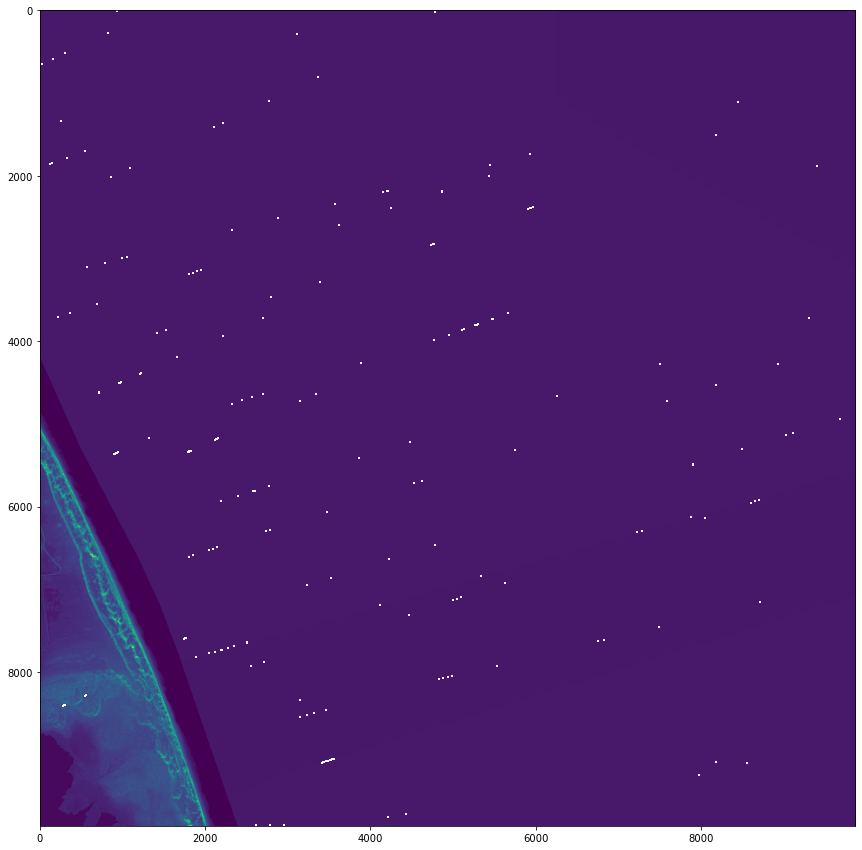

In [5]:
show_image(source, nodata=-9999)

## Process the data

We load the data with rasterio and apply binary threshold to the elevation data.

In [6]:
with rio.open(source) as src:
    data = src.read() < threshold
    if data.sum() == 0:
        print('Nothing below the threshold')
    profile = src.profile
    profile['dtype'] = 'uint8' # We're going for binary threshold and therefore adjustinng the data type
    profile.pop('nodata') # Current nodata value won't fit the data type

## Save the output

In effort to reduce the output size, we use only a single bit to encode the output. We use information from the original file to describe coordinate system, size etc.

In [7]:
with rio.open(destination, 'w', nbits=1, **profile) as dst:
    dst.write(data.astype(np.uint8))

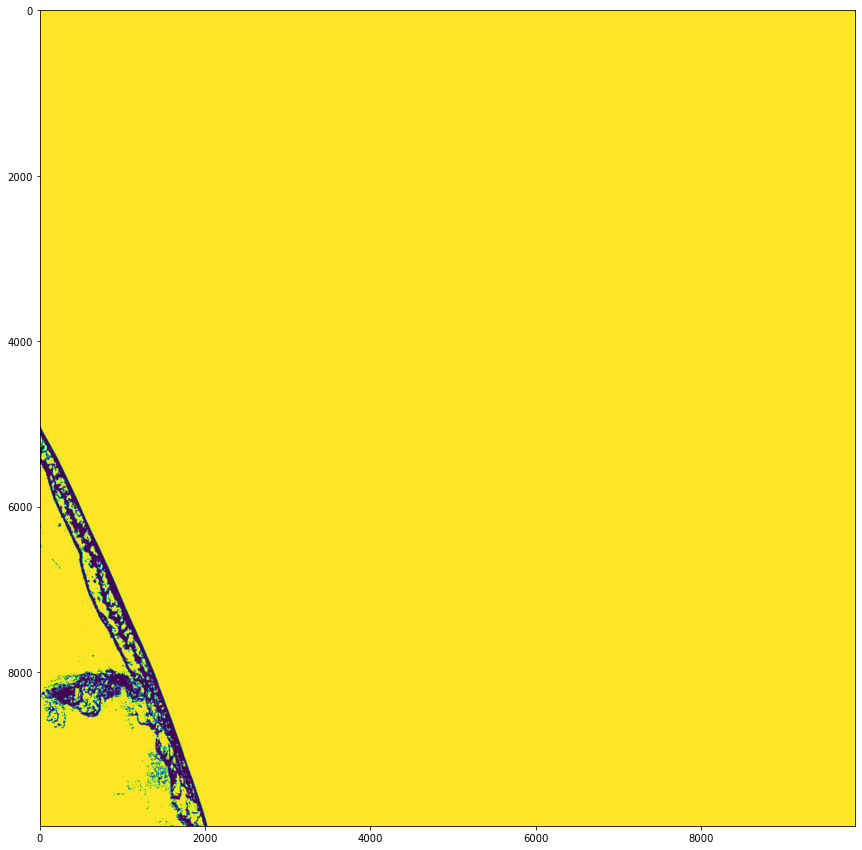

In [8]:
show_image(destination)